In [1]:
#importing the requisites for the project
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://www.google.com/flights/explore/#explore;f=SFO;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=11;lx=13;d=2018-01-16"
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.108 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

/home/mayank/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '
/home/mayank/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [3]:
bs = BeautifulSoup(driver.page_source, "lxml")

In [4]:
best_price_tags = bs.findAll('div', 'CTPFVNB-w-e')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$','').replace(',','')))
    
best_price_tags

[<div class="CTPFVNB-w-e" style="top: 57.10192672998643px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 64.69631293624141px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 47.87532459153884px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 66.31070484581497px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 57.28765493843014px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 63.69755021070301px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 62.38169472652231px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 54.104139636221205px;">$400</div>,
 <div class="CTPFVNB-w-e" style="top: 43.06805598848169px;">$400</div>,
 <div class="CTPFVNB-w-e" style="top: 53.599362262238756px;">$400</div>,
 <div class="CTPFVNB-w-e" style="top: 61.26429192735352px;">$403</div>,
 <div class="CTPFVNB-w-e" style="top: 40.83363713695468px;">$456</div>,
 <div class="CTPFVNB-w-e" style="top: 20.429978787366124px;">$621</div>,
 <div class="CTPFVNB-w-e" style="top: 50.8820469281927px;">$6

In [5]:
best_price = best_prices[0]
best_price

340

In [6]:
best_heigth_tags = bs.findAll('div', 'CTPFVNB-w-f')
best_heights = []
for t in best_heigth_tags:
    best_heights.append(float(t.attrs['style'] \
                             .split('height:')[1].replace('px;','')))
    
best_height = best_heights[0]
best_height

48.89807327001357

In [7]:
pph = best_price/best_height
pph

6.953239202749995

In [8]:
cities = bs.findAll('div', 'CTPFVNB-w-o')

In [9]:
hlist = []
for city in cities[0].findAll('div','CTPFVNB-w-x'):
    hlist.append(float(city['style'].split('height:')[1].replace('px;',''))*pph)
    
fares = pd.DataFrame(hlist, columns=['price'])
fares

,price
0,340.000000
1,671.349491
2,340.000000
3,681.350079
4,340.000000
5,709.351727
6,737.043355
7,370.001765
8,671.349491
9,410.004118


In [10]:
fares.min()

price    340.0
dtype: float64

In [11]:
fares.median()

price    441.435967
dtype: float64

In [12]:
fares.describe()

,price
count,60.000000
mean,493.031502
std,117.762910
min,340.000000
25%,431.335373
50%,441.435967
75%,600.897847
max,737.043355


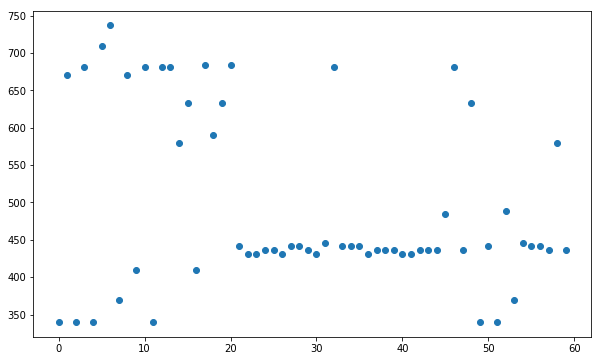

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])), fares['price'])

In [14]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fares']).reset_index()

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps = 0.5, min_samples=1).fit(X)

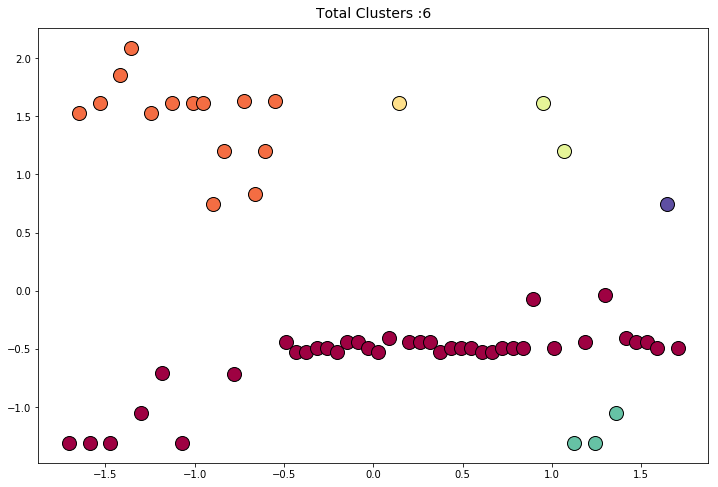

In [17]:
labels = db.labels_
unique_labels = set(labels)
clusters = len(unique_labels)

colors = plt.cm.Spectral(np.linspace(0, 1, clusters))

plt.subplots(figsize=(12,8))
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[ :, 0], xy[ :, 1], 'o', markerfacecolor=c, markeredgecolor='k', markersize=14)
    plt.title("Total Clusters :{}".format(clusters),fontsize=14,y=1.01)

In [18]:
#lets concat the label to the dataframe
labelled_dataframe = pd.concat([ff, pd.DataFrame(db.labels_, columns=['cluster'])], axis = 1)
labelled_dataframe

,index,fares,cluster
0,0,340.000000,0
1,1,671.349491,1
2,2,340.000000,0
3,3,681.350079,1
4,4,340.000000,0
5,5,709.351727,1
6,6,737.043355,1
7,7,370.001765,0
8,8,671.349491,1
9,9,410.004118,0


In [19]:
#lets group by the dataframe on the clusters and finf the min and count for the cluster
agg_result = labelled_dataframe.groupby('cluster')['fares'].agg(['min','count'])
agg_result

,min,count
cluster,,
0,340.000000,39
1,580.014118,14
2,681.350079,1
3,633.547267,2
4,340.000000,3
5,580.014118,1
